In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. 初步找到不含缺失值的列

In [40]:
class Handling_Missing_Values:
    
    def find_notnan_cols(self,data):
        """返回数据框中不含有np.NaN的列的列名

        :param data: 原数据框
        :param return: 不含有np.NaN的列的列名"""
        des = data.describe(include = "all")
        l = len(data)
        s = des.iloc[0]
        notnan_cols = list(s[s == l].index)
        print("数据框中不含 np.NaN 的列名为 %s" %notnan_cols)
        return notnan_cols
    
    def replace_nan(self,data):
        """将空字符串替换成np.NaN

        :param return: 返回替换完毕的数据框
        """
        data = data.replace(" ",np.NaN)
        return data

In [42]:
detail_nan = Detail_Nan()
detail_nan.find_notnan_cols(data)

数据框中不含 np.NaN 的列名为 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare']

# 2.替换成缺失值

In [5]:
def replace_nan(data):
    """将空字符串替换成np.NaN
    
    :param return: 返回替换完毕的数据框
    """
    data = data.replace(" ",np.NaN)
    return data

# 3. 缺失值生成虚拟变量

In [6]:
def dummy_nan(data,var,y):
    """通过判断特征值是否有缺失值定义一个新的二分类变量
    
    :param data: 待处理数据框
    :param var: 含有缺失值的变量名
    :param y: 类别型的目标变量名
    :param return: 返回添加了新列的数据框，并展示新列与目标变量的关系图
    """
    import seaborn as sns
    data[var+"_is_nan"] = data[var].copy()
    data.loc[(data[var].notnull()),var+"_is_nan"] = 0
    data.loc[(data[var].isnull()),var+"_is_nan"] = 1
    
    fig,ax = plt.subplots(figsize = (10,5))
    sns.countplot(x = var+"_is_nan",hue = y,data = data)
    plt.show()
    return data

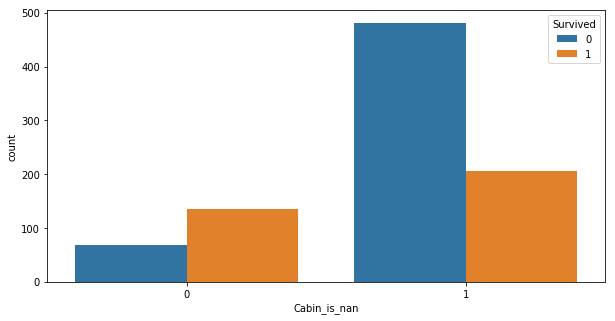

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_is_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [7]:
dummy_nan(data = data,var = "Cabin",y = "Survived")

# 4.RandomForest算法

In [33]:
def rf_filled(data,var,dispersed = True):    
    """利用随机森林填充缺失值

    :param data: 利用随机森林填充缺失的x和y，必须符合随机森林模型的输入要求
    :param var: 待填充的变量名
    :param dispersed: 默认dispersed = True表示利用随机森林进行填充的变量是离散型，做分类预测
    :param return: 返回填充完毕的数据框
    """    
    te = data[data[var].notnull()] #整个数据中，待填充的列非缺失的所有行
    cols = list(data.columns)
    cols.remove(var)
    te_X = (te.loc[:,cols]).astype(float)
    te_Y = (te.loc[:,var]).astype(float)

    tr = data[data[var].isnull()] #整个数据中，待填充的列非缺失的所有行
    tr_X = (tr.loc[:,cols]).astype(float)
    tr_Y = (tr.loc[:,var]).astype(float)
    
    if y_type == "Categorical":
        from sklearn.ensemble import RandomForestClassifier
        rfc = RandomForestClassifier(random_state = 0)
        rfc.fit(te_X,te_Y)
        pre = rfc.predict(tr_X)
        data.loc[data[var].isnull(),var] = pre
        print("变量[%s] 利用随机森林填充完毕" % var)
        return data
    elif y_type == "Continous":
        from sklearn.ensemble import RandomForestRegressor
        rfr = RandomForestRegressor(random_state = 0)
        rfr.fit(te_X,te_Y)
        pre = rfr.predict(tr_X)
        data.loc[data[var].isnull(),var] = pre
        print("变量[%s] 利用随机森林填充完毕" % var)
        return data      
    else:
        print("请输入正确的待填充列数据类型")

In [78]:
def rf_filled(data,x_cols,y,dispersed = True,n_estimators = 10,max_depth = None,min_samples_split = 2,min_samples_leaf = 1): 
    """利用随机森林填充缺失值

    :param data: 利用随机森林填充缺失的x和y，必须符合随机森林模型的输入要求
    :param var: 待填充的变量名
    :param dispersed: 默认dispersed = True表示利用随机森林进行填充的变量是离散型，做分类预测
    :param n_estimators: 随机森林中的树的棵树，默认10颗树
    :param max_depth: 默认树的最大深度没有限制
    :param min_samples_split: 默认子节点分裂的最小样本数为2个
    :param min_samples_leaf: 默认叶子节点中最小样本数为1个
    :param return: 返回
    """    
    from sklearn.model_selection import train_test_split  
    # 拆分无缺失值的数据集为训练集，测试集。含缺失值的x，y进行预测
    df = pd.concat([data.loc[:,x_cols],data.loc[:,y]],axis=1)
    df_notnull = df.loc[df[y].notnull(),:]
    df_isnull = df.loc[df[y].isnull(),:]
    
    train,test = train_test_split(df_notnull,random_state = 0)
    x_train = train.loc[:,x_cols].astype(float)
    y_train = train.loc[:,y].astype(float)
    x_test = test.loc[:,x_cols].astype(float)
    y_test = test.loc[:,y].astype(float)
    x_pre = df_isnull.loc[:,x_cols].astype(float)
    
    if dispersed:
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score
        rfc = RandomForestClassifier(n_estimators = 10,max_depth = None,min_samples_split = 2,
                                    min_samples_leaf = 1)
        rfc.fit(x_train,y_train)
        y_predict_train = rfc.predict(x_train)
        accuracy1 = accuracy_score(y_pred=y_predict_train,y_true=y_train)
        print("RFC模型训练集结果为 accuracy = %s" % accuracy1)
        y_predict_test = rfc.predict(x_test)
        accuracy2 = accuracy_score(y_pred=y_predict_test,y_true=y_test)
        print("RFC模型测试集结果为 accuracy = %s" % accuracy2)
        y_pre = rfc.predict(x_pre)
        return df_isnull.index,y_pre
    else:
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.metrics import mean_squared_error
        rfr = RandomForestRegressor(n_estimators = 10,max_depth = None,min_samples_split = 2,
                                    min_samples_leaf = 1)
        rff.fit(x_train,y_train)
        y_predict_train = rff.predict(x_train)
        mse1 = mean_squared_error(y_pred=y_predict_train,y_true=y_train)
        print("RFC模型训练集结果为 mse = %s" %(mse1))
        y_predict_test = rfr.predict(x_test)
        mse2 = mean_squared_error(y_pred = y_predict_test,y_true=y_test)
        print("RFC模型测试集结果为 mse = %s" %(mse2))
        y_pre = rfr.predict(x_pre)
        return df_isnull.index,y_pre

函数测试

In [79]:
data1 = data[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
data1.loc[data["Sex"] == "male","Sex"] = 0
data1.loc[data["Sex"] == "female","Sex"] = 1
# data["Sex"] = data["Sex"].astype()
data1.loc[data["Embarked"] == "S","Embarked"] = 0
data1.loc[data["Embarked"] == "C","Embarked"] = 1
data1.loc[data["Embarked"] == "Q","Embarked"] = 2
print(data1.info())
data1.head()

/home/sundali/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB
None


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [80]:
data11 = rf_filled(data=data1,x_cols = ['Survived','Pclass','Sex','SibSp','Parch','Fare'],y="Embarked",dispersed = True)
data11
# data1 = rf_filled(data = data,)

RFC模型训练集结果为 accuracy = 0.9669669669669669
RFC模型测试集结果为 accuracy = 0.852017937219731


(Int64Index([61, 829], dtype='int64'), array([0., 0.]))

# 5. KNN填充

In [36]:
data = pd.DataFrame([[234,67,234,87],[45,45,87,45],[78,44,78,78],
                   [54,54,np.NaN,54],[667,33,44,98],[76,43,np.NaN,76],
                   [56,66,56,99],[56,56,56,56]],columns=["X1","X2","X3","X4"])
print(data)
x_cols = ["X1","X2","X4"]
y = "X3"
# test_size = 0.1,
k=3
dispersed = False
print(x_cols)

    X1  X2     X3  X4
0  234  67  234.0  87
1   45  45   87.0  45
2   78  44   78.0  78
3   54  54    NaN  54
4  667  33   44.0  98
5   76  43    NaN  76
6   56  66   56.0  99
7   56  56   56.0  56
['X1', 'X2', 'X4']


In [38]:
index,value = knn_filled(data= data,x_cols=x_cols,k= 1,y = "X3",dispersed= dispersed)
data.ix[index,y] = value
data

KNN的K为【1】时,模型在训练集结果为 mse = 0.0
KNN的K为【1】时,模型在测试集结果为 mse = 521.0


/home/sundali/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sundali/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the docu

,X1,X2,X3,X4
0,234,67,234.0,87
1,45,45,87.0,45
2,78,44,78.0,78
3,54,54,87.0,54
4,667,33,44.0,98
5,76,43,87.0,76
6,56,66,56.0,99
7,56,56,56.0,56


In [37]:
def knn_filled(data,x_cols,y,k=3,dispersed = True):
    """利用KNN填充缺失值.
    
    :param data: 原数据框
    :param x_cols: 不含缺失值并且打算用来进行knn训练的x的列名的列表，如x_cols = ["年龄","收入","孩子数量"]
    :param y: 准备填充的列的列名的字符串,如 y = "是否违约"
    :param test_size: 训练模型时测试集的比例，默认 test_size = 0.3
    :param k: knn模型的k，默认 k = 3
    :param dispersed: 默认 dispersed = True，表示要填充的列是离散还是连续，使用knn做分类
    :param return: 要填充的行的index，预测出来的填充值
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    
    # 拆分无缺失值的数据集为训练集，测试集。含缺失值的x，y进行预测
    df = pd.concat([data.loc[:,x_cols],data.loc[:,y]],axis=1)
    df_notnull = df.loc[df[y].notnull(),:]
    df_isnull = df.loc[df[y].isnull(),:]
    
    train,test = train_test_split(df_notnull,random_state = 0)
    x_train = train.loc[:,x_cols]
    y_train = train.loc[:,y]
    x_test = test.loc[:,x_cols]
    y_test = test.loc[:,y]
    x_pre = df_isnull.loc[:,x_cols]
    
    # 数据标准化
    ss = StandardScaler()
    x_train = ss.fit_transform(x_train)
    x_test = ss.transform(x_test)
    x_pre = ss.transform(x_pre)
    
    if dispersed:
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train,y_train)
        y_predict_train = knn.predict(x_train)
#         y_predict_train_proba = knn.predict_proba(x_train)
        acc_score1 = accuracy_score(y_pred=y_predict_train,y_true=y_train)
#         roc_auc_score1 = roc_auc_score(y_score=y_predict_train_proba,y_true=y_train)
        precision1 = precision_score(y_pred=y_predict_train,y_true=y_train)
        recall1 = recall_score(y_pred=y_predict_train,y_true=y_train)
        print("KNN的K为【%d】时,模型训练集结果为 accuracy = %s,precision = %s,recall = %s" %(k,acc_score1,precision1,recall1))
        y_predict_test = knn.predict(x_test)
#         y_predict_test_proba = knn.predict_proba(x_test)
        acc_score2 = accuracy_score(y_pred=y_predict_test,y_true=y_test)
#         roc_auc_score2 = roc_auc_score(y_score=y_predict_test_proba,y_true=y_test)
        precision2 = precision_score(y_pred=y_predict_test,y_true=y_test)
        recall2 = recall_score(y_pred=y_predict_test,y_true=y_test)
        print("KNN的K为【%d】时,模型测试集结果为 accuracy = %s,precision = %s,recall = %s" %(k,acc_score2,precision2,recall2))
        y_pre = knn.predict(x_pre)
        return df_isnull.index,y_pre
        
    else:
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.metrics import mean_squared_error
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(x_train,y_train)
        y_predict_train = knn.predict(x_train)
        mse1 = mean_squared_error(y_pred=y_predict_train,y_true=y_train)
        print("KNN的K为【%d】时,模型在训练集结果为 mse = %s" %(k,mse1))
        y_predict_test = knn.predict(x_test)
        mse2= mean_squared_error(y_pred=y_predict_test,y_true=y_test)
        print("KNN的K为【%d】时,模型在测试集结果为 mse = %s" %(k,mse2))
        
        y_pre = knn.predict(x_pre)
        return df_isnull.index,y_pre

In [81]:
import ycimpute 

In [ ]:
from sklearn.tree import DecisionTreeClassifier